In [ ]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import activations
from keras import layers,models,Sequential

In [34]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(3))


   timestamp         x         y         z
0   0.433767 -0.000000 -0.000000 -0.000000
1   0.533867  0.000237 -0.001058  0.012539
2   0.567234  0.000678 -0.001695  0.032516


/tmp/ipykernel_1260/829478411.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


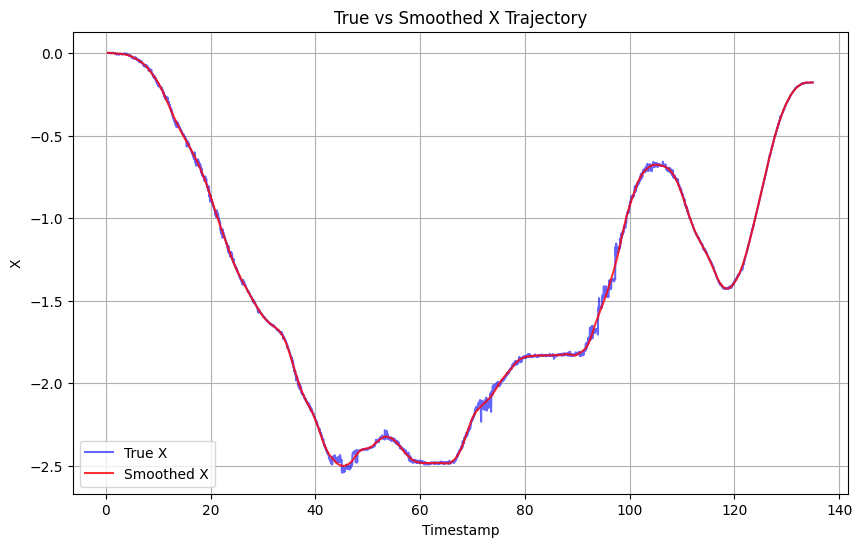

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming you have your DataFrame df with a column 'x' for the trajectory data
x_values = df['x'].values  # Replace with your actual 'x' values from DataFrame

# Apply the Savitzky-Golay filter to smooth the data
# window_length is the size of the filter window (it should be an odd number)
# polyorder is the order of the polynomial used to fit the filter
# MUST: config window_length and polyorder manually, ask gpt how that work
smoothed_x = savgol_filter(x_values, window_length=256, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], x_values, label='True X', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_x, label='Smoothed X', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('True vs Smoothed X Trajectory')
plt.legend()
plt.grid(True)
plt.show()


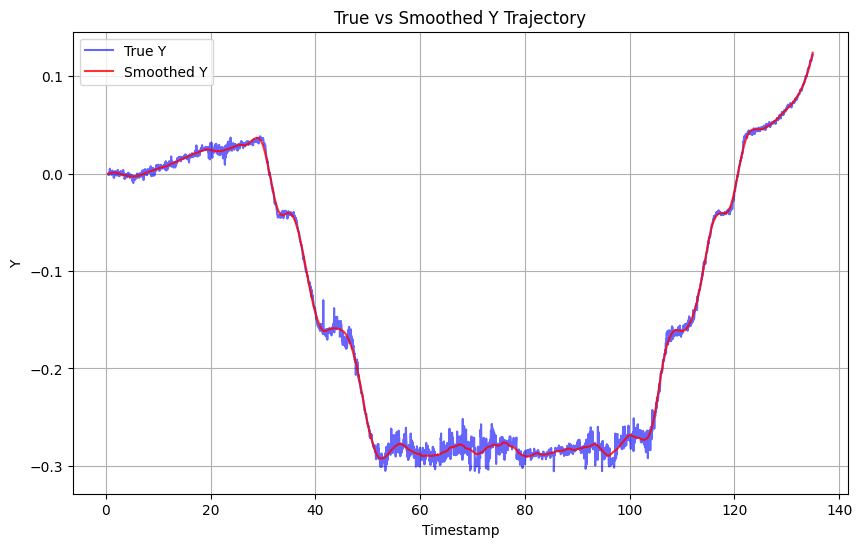

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


y_values = df['y'].values
smoothed_y = savgol_filter(y_values, window_length=256+8, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], y_values, label='True Y', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_y, label='Smoothed Y', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('True vs Smoothed Y Trajectory')
plt.legend()
plt.grid(True)
plt.show()


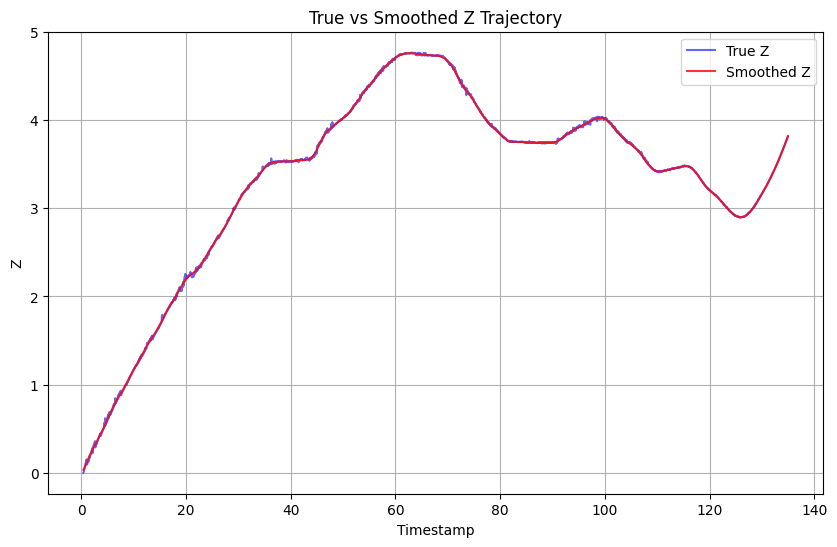

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

z_values = df['z'].values
smoothed_z = savgol_filter(z_values, window_length=256, polyorder=6)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], z_values, label='True Z', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_z, label='Smoothed Z', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('True vs Smoothed Z Trajectory')
plt.legend()
plt.grid(True)
plt.show()
  

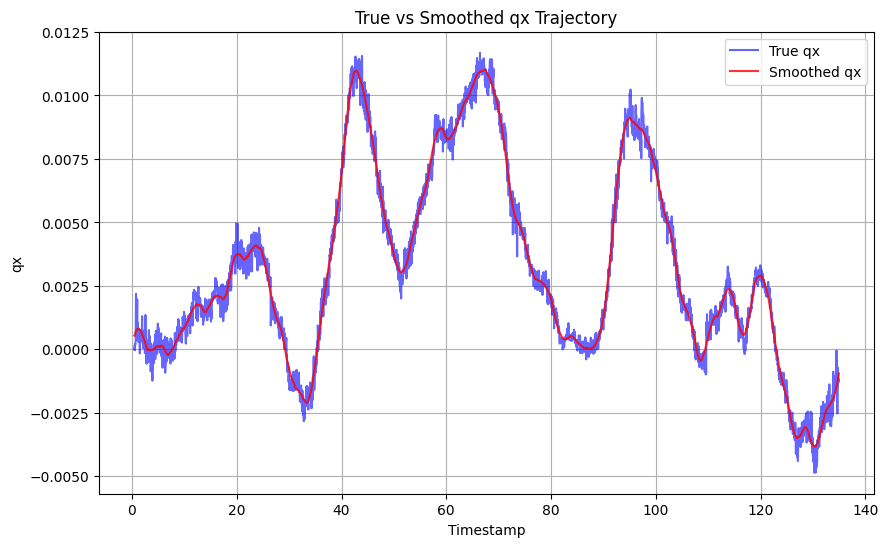

In [38]:
# Apply savgol_filter to qx
smooth_qx = savgol_filter(df['qx'], window_length=128, polyorder=3)

# Plot the true vs smoothed qx
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['qx'], label='True qx', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smooth_qx, label='Smoothed qx', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('qx')
plt.title('True vs Smoothed qx Trajectory')
plt.legend()
plt.grid(True)
plt.show()


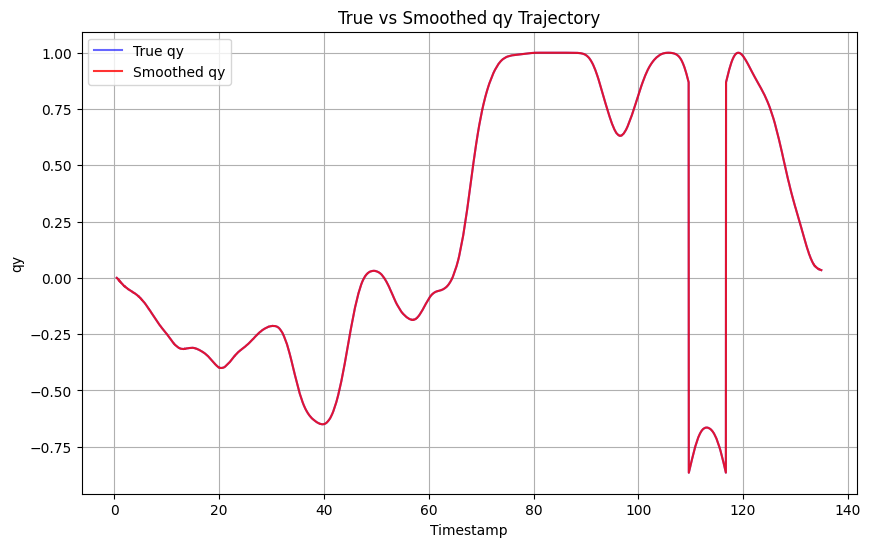

In [39]:
# Apply savgol_filter to qy
smooth_qy = savgol_filter(df['qy'], window_length=3, polyorder=2)

# Plot the true vs smoothed qx
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['qy'], label='True qy', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smooth_qy, label='Smoothed qy', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('qy')
plt.title('True vs Smoothed qy Trajectory')
plt.legend()
plt.grid(True)
plt.show()

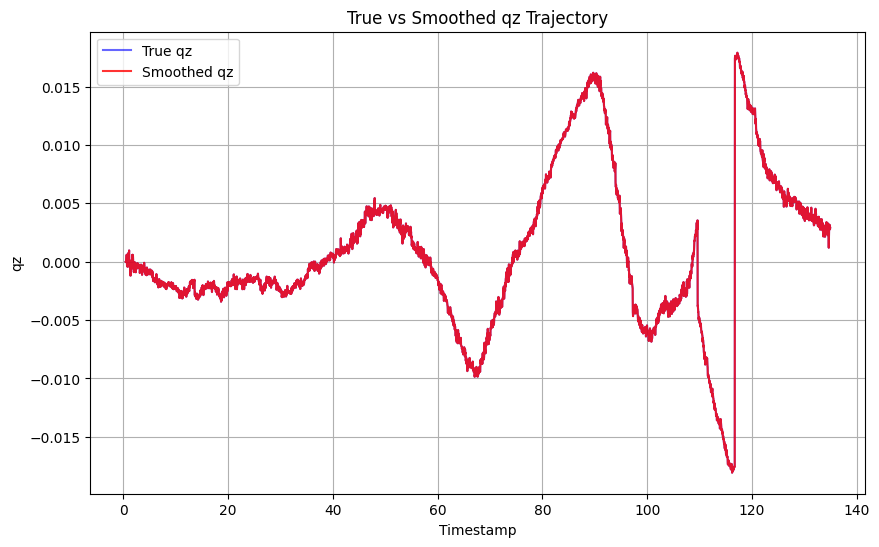

In [40]:
# Apply savgol_filter to qz
smooth_qz = savgol_filter(df['qz'], window_length=3, polyorder=2)

# Plot the true vs smoothed qz
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['qz'], label='True qz', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smooth_qz, label='Smoothed qz', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('qz')
plt.title('True vs Smoothed qz Trajectory')
plt.legend()
plt.grid(True)
plt.show()

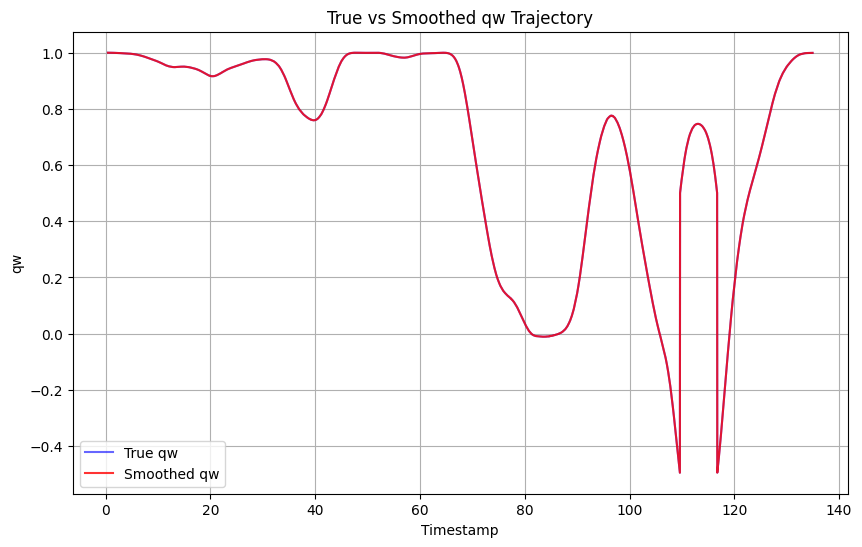

In [41]:
# Apply savgol_filter to qw
smooth_qw = savgol_filter(df['qw'], window_length=3, polyorder=2)

# Plot the true vs smoothed qw
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['qw'], label='True qw', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smooth_qw, label='Smoothed qw', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('qw')
plt.title('True vs Smoothed qw Trajectory')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Normalize the quaternions
def normalize_quaternion(qx, qy, qz, qw):
    norm = np.sqrt(qx**2 + qy**2 + qz**2 + qw**2)
    return qx / norm, qy / norm, qz / norm, qw / norm

normalized_qx, normalized_qy, normalized_qz, normalized_qw = zip(*[
    normalize_quaternion(qx, qy, qz, qw)
    for qx, qy, qz, qw in zip(smooth_qx, smooth_qy, smooth_qz, smooth_qw)
])

In [43]:
# Create a DataFrame with the smoothed values
smoothed_df = pd.DataFrame({
    'timestamp': df['timestamp'],
    'x': smoothed_x,
    'y': smoothed_y,
    'z': smoothed_z,
    'qx': smooth_qx,
    'qy': smooth_qy,
    'qz': smooth_qz,
    'qw': smooth_qw
})

# Export to smoothed_trajectory.txt
output_path = './output/smoothed_trajectory.txt'
smoothed_df.to_csv(output_path, sep=' ', index=False, header=False)

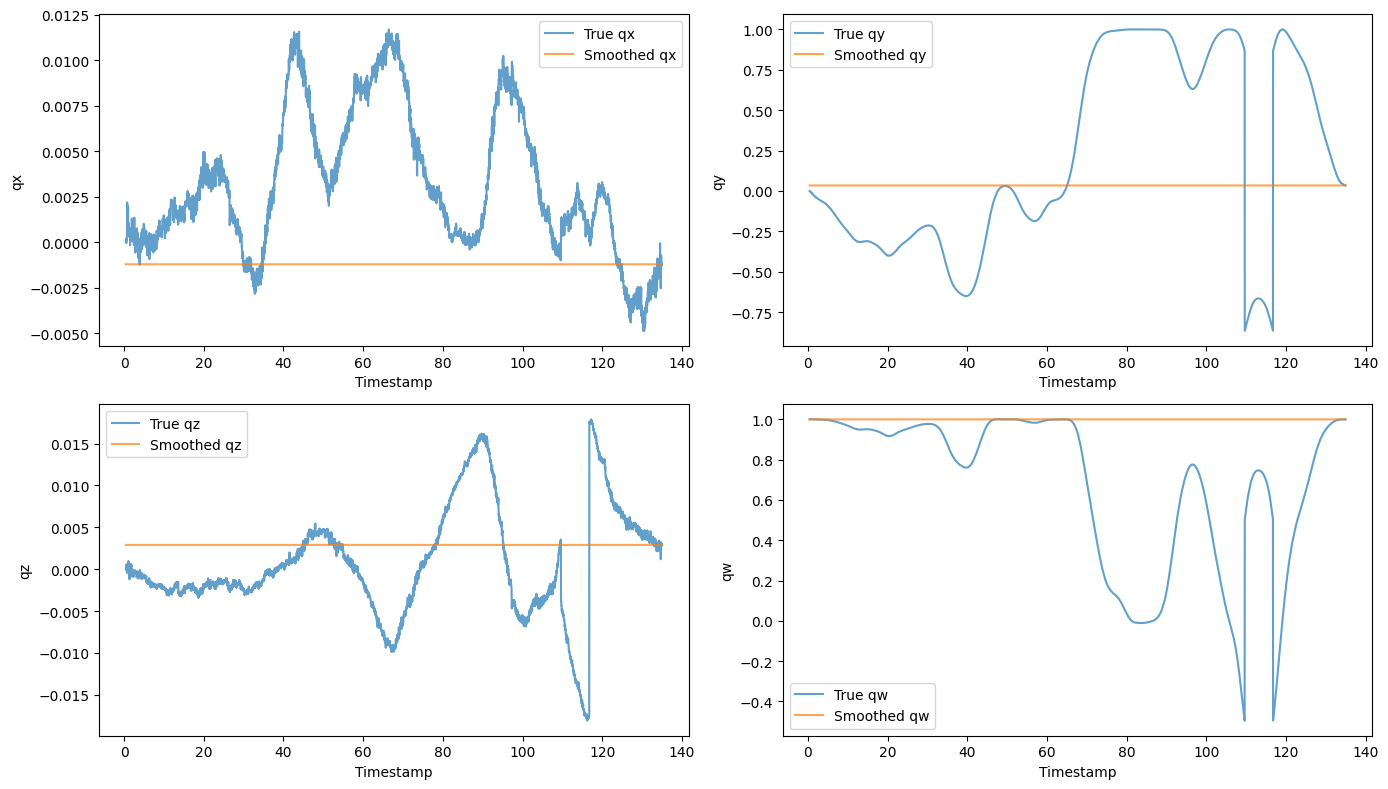

In [50]:
# Quaternion Kalman Filter Class
class QuaternionKalmanFilter:
    def __init__(self, q0, process_noise=1e-5, measurement_noise=1e-1):
        self.q = np.array(q0)  # Initial quaternion estimate (unit vector)
        self.P = np.eye(4)  # Initial error covariance matrix
        self.process_noise = process_noise  # Process noise covariance
        self.measurement_noise = measurement_noise  # Measurement noise covariance

    def predict(self, q_dot):
        # Prediction step: predict the next quaternion state
        self.q += q_dot  # Predicted quaternion (assuming constant angular velocity)
        self.P += self.process_noise  # Update error covariance

    def update(self, q_measurement):
        # Correction step: update with the measurement (the noisy quaternion)
        innovation = q_measurement - self.q  # Innovation (residual)
        self.q += innovation  # Update estimate
        self.P -= self.measurement_noise  # Update error covariance

# Function to apply Kalman filter to quaternion data
def apply_kalman_filter(df, q0, process_noise=0.000015, measurement_noise=0.000015):
    kf = QuaternionKalmanFilter(q0=q0, process_noise=process_noise, measurement_noise=measurement_noise)
    smoothed_quaternions = []
    
    for i in range(len(df)):
        q_measurement = df.iloc[i][['qx', 'qy', 'qz', 'qw']].to_numpy()
        kf.predict(np.zeros(4))  # No angular velocity model, simple prediction
        kf.update(q_measurement)  # Update with the measurement (true quaternion)
        smoothed_quaternions.append(kf.q)
    
    return np.array(smoothed_quaternions)

# Initial quaternion (starting from the first quaternion in the data)
initial_q = df.iloc[0][['qx', 'qy', 'qz', 'qw']].to_numpy()

# Apply the Kalman filter

# Apply Kalman filter with different process_noise and measurement_noise values
process_noise = 1e-3  # Moderate process noise for rapid changes
measurement_noise = 1e-2  # Moderate measurement noise for noisy sensor data

smoothed_quaternions = apply_kalman_filter(df, initial_q, process_noise=process_noise, measurement_noise=measurement_noise)

# Visualize the results
plt.figure(figsize=(14, 8))

# Plot qx component
plt.subplot(2, 2, 1)
plt.plot(df['timestamp'], df['qx'], label='True qx', alpha=0.7)
plt.plot(df['timestamp'], smoothed_df['smoothed_qx'], label='Smoothed qx', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('qx')
plt.legend()

# Plot qy component
plt.subplot(2, 2, 2)
plt.plot(df['timestamp'], df['qy'], label='True qy', alpha=0.7)
plt.plot(df['timestamp'], smoothed_df['smoothed_qy'], label='Smoothed qy', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('qy')
plt.legend()

# Plot qz component
plt.subplot(2, 2, 3)
plt.plot(df['timestamp'], df['qz'], label='True qz', alpha=0.7)
plt.plot(df['timestamp'], smoothed_df['smoothed_qz'], label='Smoothed qz', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('qz')
plt.legend()

# Plot qw component
plt.subplot(2, 2, 4)
plt.plot(df['timestamp'], df['qw'], label='True qw', alpha=0.7)
plt.plot(df['timestamp'], smoothed_df['smoothed_qw'], label='Smoothed qw', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('qw')
plt.legend()

plt.tight_layout()
plt.show()
